In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import cv2
import pathlib
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline 

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
def loss(A,B,C):
    return np.sqrt(np.sum(np.square(A-B@C).mean()))


In [ ]:
def nmf(df,r,iter=500):
  weights = np.random.rand(r,df.shape[1])
  basis = np.random.rand(df.shape[0],r)
  ones = np.ones(df.shape)
  basis = normalize(basis)
  lossm=[]
 

  for i in range(iter):
    weights*= ((basis.T@(df/(basis@weights)))/(basis.T@ones))
    basis*= (((df/(basis@weights))@weights.T)/(ones@weights.T))
    basis = normalize(basis)
    lossm.append(loss(df,basis,weights))
  
  
  plt.plot(range(iter),lossm)
  plt.xlabel("No. of iterations")
  plt.ylabel("Loss")
  plt.show()
  return basis , weights


In [ ]:
def get_data():
 
  data_dir = "/content/drive/My Drive/FR_ORL"
  data_dir = pathlib.Path(data_dir)
  image_list = {}
  train=[]

  for folder in data_dir.glob('*'):
      image_list[folder.name] = list(data_dir.glob(folder.name + '/*'))
  del image_list['README']
  for folder in image_list:
    for files in image_list[folder]:
      if (files.name!='10.pgm') :
        im=Image.open(files)
        train.append(np.array(im))
  
 
  X=np.array(train[0].reshape(1,-1))
  for i in range(1,len(train)):
    X=np.append(X,train[i].reshape(1,-1), axis=0)
  
  X= X.T
  return X,image_list

In [ ]:
def detect(basis , weights, image_list,im):  
 
  im=im.reshape((1,-1))
  im=im.T
  invb =np.linalg.pinv(basis)
  sve =(invb@im)
  score =[]
  for i in range(weights.shape[1]):
    ch = weights[:,i]
    temp = np.dot(ch,sve)
    temp = temp/(np.linalg.norm(ch)*np.linalg.norm(sve))
    score.append(temp)
  max = np.argmax(np.array(score))
  return max

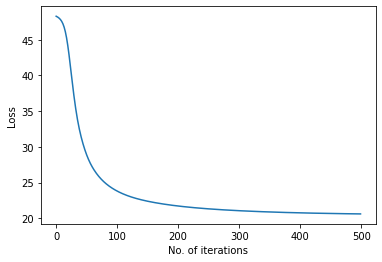

In [ ]:

##def main():
X,image_list = get_data()
basis, weights = nmf(X,50)





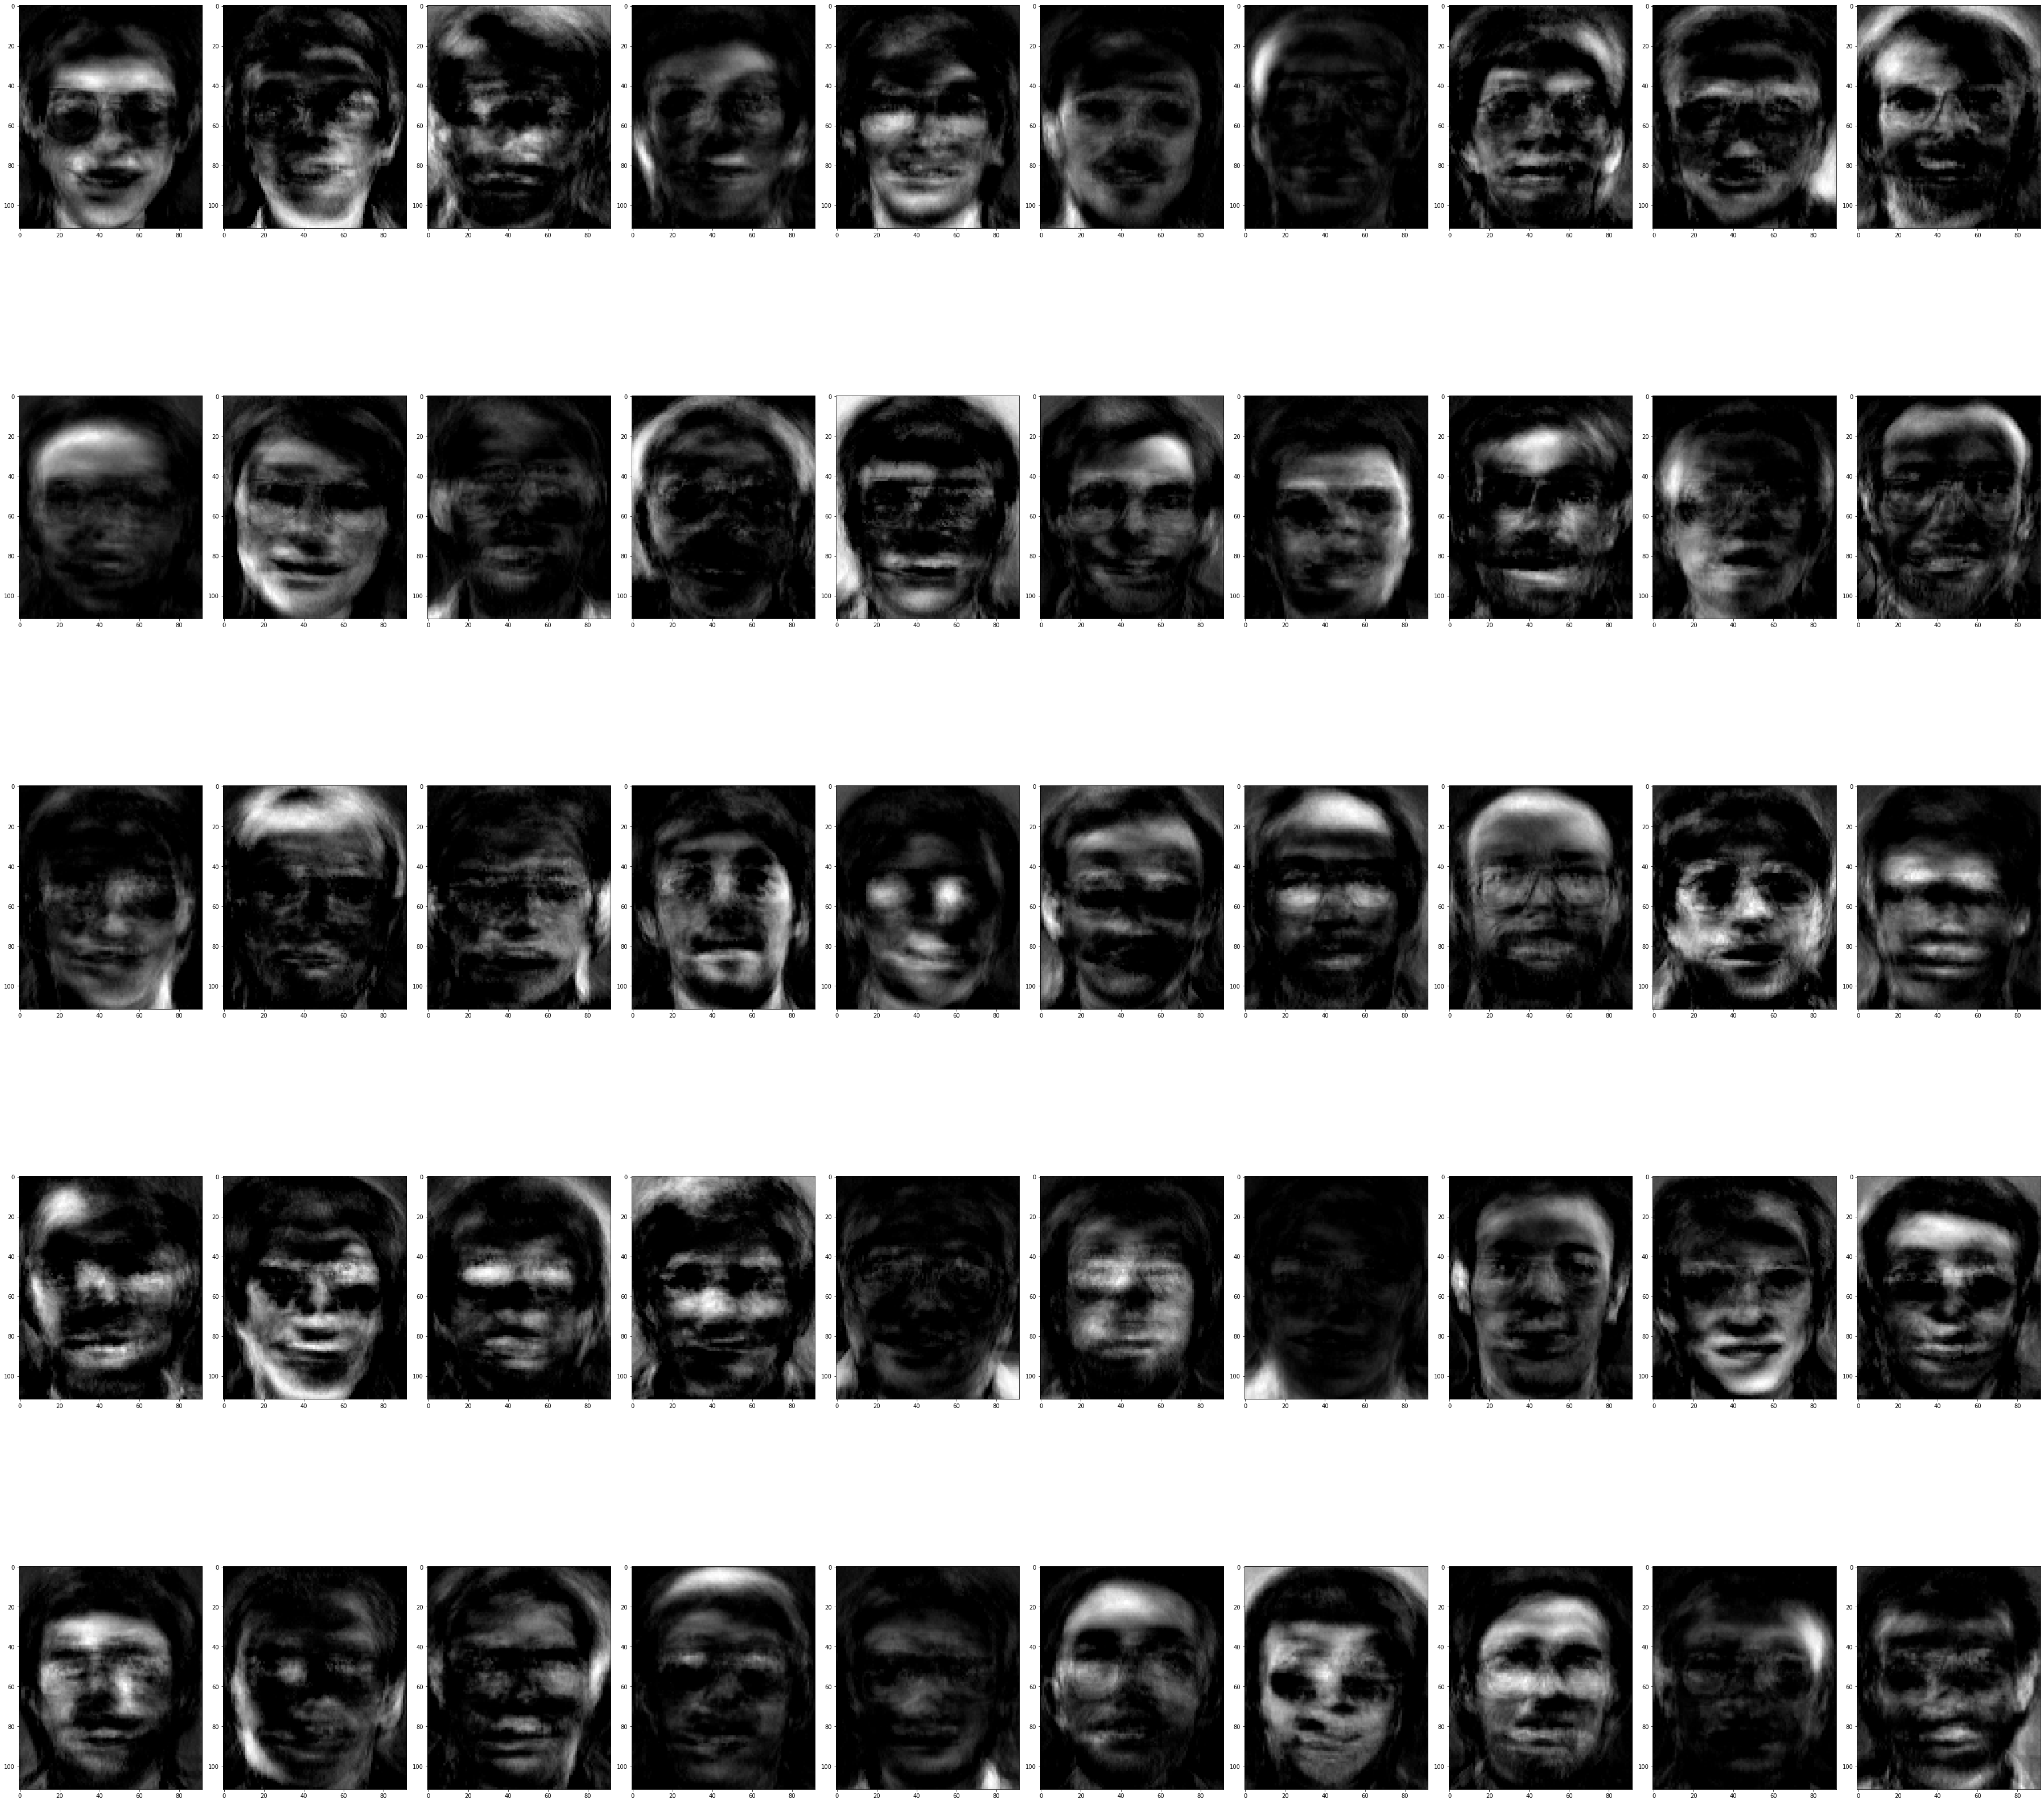

In [ ]:
axes = []
fig=plt.figure(figsize=(50, 50))
rows, cols = 5,10
for a in range(50):
    axes.append( fig.add_subplot(rows, cols, a+1) )
    temp_img = show[a,:,:]
    temp_img = temp_img*255
    plt.imshow(temp_img, cmap="gray")
fig.tight_layout()    
plt.show()

Text(0.5, 1.0, 'Predicted Image')

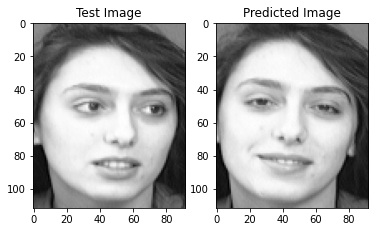

In [ ]:
for files in image_list['s8']:
  if (files.name=='10.pgm'):
     im=np.array(Image.open(files))


max = detect(basis ,weights, image_list,im)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im, cmap='gray')
axarr[0].set_title('Test Image')
axarr[1].imshow(X[:,max].reshape((112,92)), cmap ='gray')
axarr[1].set_title('Predicted Image')


Text(0.5, 1.0, 'Predicted Image')

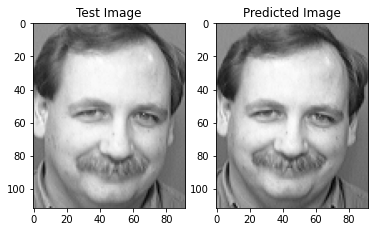

In [ ]:
for files in image_list['s25']:
  if (files.name=='10.pgm'):
     im=np.array(Image.open(files))


max = detect(basis ,weights, image_list,im)
f, axarr = plt.subplots(1,2)
axarr[0].imshow(im, cmap='gray')
axarr[0].set_title('Test Image')
axarr[1].imshow(X[:,max].reshape((112,92)), cmap ='gray')
axarr[1].set_title('Predicted Image')


In [ ]:
show  = (basis.T).reshape((50,112,92))